# IBM Project: Real-Time Communication System Powered by AI for Specially Abled
# TEAM ID: PNT2022TMID35886

# --------------------------------------------------------------------------------------------------

# IMPORTING NECESSARY LIBRARIES

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# RENAMING DATA FILES

In [65]:
def rename_imgs(file_name):
    folder_path = r'asl_dataset/'+file_name

    num = 0
    for file in os.listdir(folder_path):
        # if num%10 == 0:
        #     print(f'Renamed {num} files...')
        #os.rename(folder_path+'\\'+file, folder_path+'\\'+file_name+'_'+str(num)+'.jpeg')
        num += 1

In [47]:
file_names = '0123456789'+'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for fn in file_names:
    rename_imgs(fn)

# DISPLAYING SAMPLE IMAGES FROM DATASET

In [17]:
data_path = 'asl_dataset/'

In [68]:
def display(img,sign=None):
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.title(sign)
    ax.imshow(img)

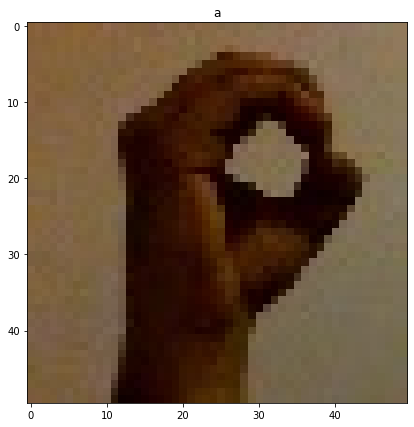

In [82]:
sign_img = cv2.imread(data_path+'O/O_234.jpeg')
display(sign_img,'a')

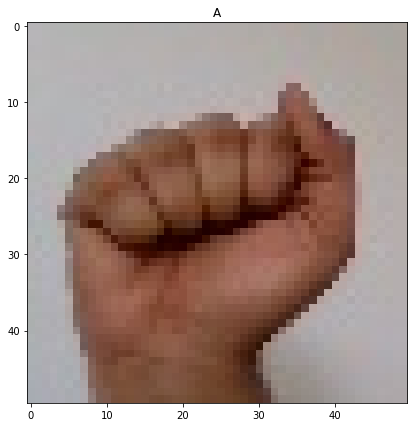

In [97]:
sign_img = cv2.imread(data_path+'A/A_204.jpeg')
display(sign_img,'A')

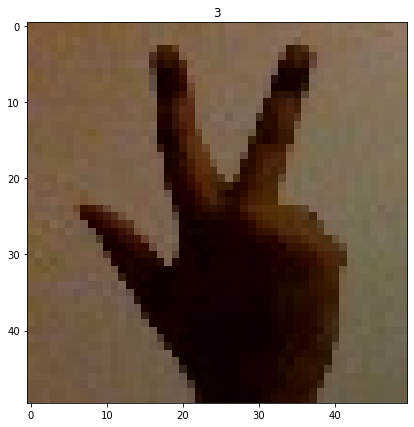

In [96]:
sign_img = cv2.imread(data_path+'3/3_340.jpeg')
display(sign_img,'3')

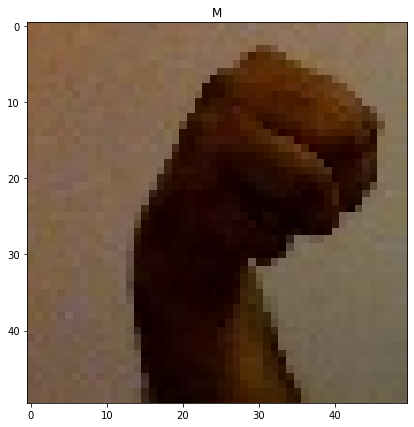

In [95]:
sign_img = cv2.imread(data_path+'M/M_100.jpeg')
display(sign_img,'M')

# AUGMENTATION AND PREPROCESSING THE DATASET

## Creating ImageDataGenerator

In [108]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rescale=1/255,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.25)

## Original Image

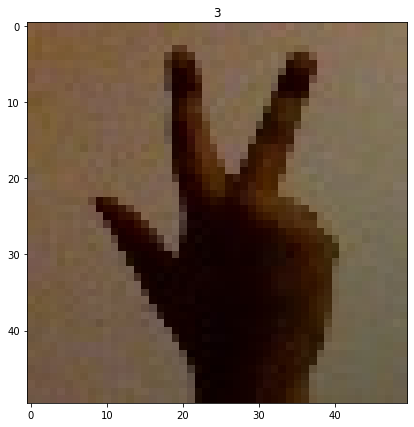

In [98]:
sign_img = cv2.imread(data_path+'3/3_100.jpeg')
display(sign_img,'3')

## Augmented Images

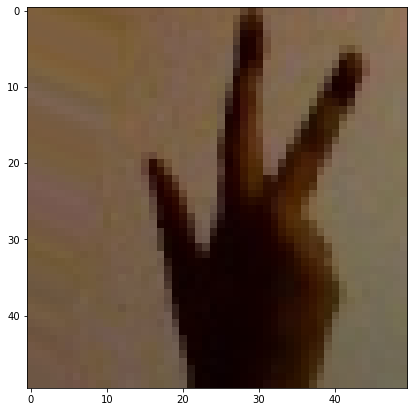

In [101]:
display(image_gen.random_transform(sign_img))

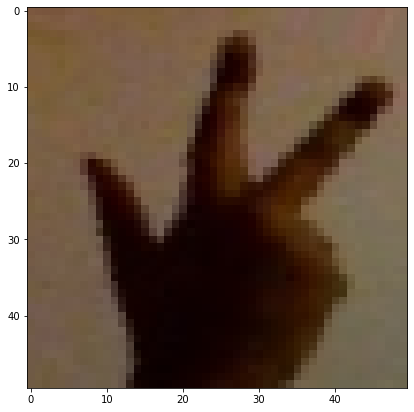

In [102]:
display(image_gen.random_transform(sign_img))

# SPLITING INTO TRAIN AND VALIDATION DATASET

In [109]:
train_data_gen = image_gen.flow_from_directory(data_path,
                                           target_size=(250,250),
                                           batch_size=16,
                                           shuffle=True,
                                           class_mode='binary',
                                           subset='training')

Found 40500 images belonging to 36 classes.


In [110]:
validation_data_gen = image_gen.flow_from_directory(data_path,
                                           target_size=(250,250),
                                           batch_size=16,
                                           shuffle=True,
                                           class_mode='binary',
                                           subset='validation')

Found 13500 images belonging to 36 classes.


In [111]:
train_data_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35}

In [112]:
len(train_data_gen.classes)

40500